# Neural Network and its Applications

## Table of Contents
- [Table of Contents](#table-of-contents)
- [What are Neural Networks?](#what-are-neural-networks)
- [Neural Network Representation](#neural-network-representation)
- [How do Neural Networks work?](#how-do-neural-networks-work)
    - [Forward Propagation](#forward-propagation)
    - [Backward Propagation](#backward-propagation)
- [Hyperparameters](#hyperparameters)
- [Planar Data Classification with a Neural Network](#planar-data-classification-with-a-neural-network)
- [Deep Neural Networks](#deep-neural-networks)
- [Application of Deep Neural Networks: Image Classification](#application-of-deep-neural-networks-image-classification)
- [More Complex Neural Networks](#more-complex-neural-networks)

## What are Neural Networks?
- A neural network is a computational model that has a network architecture made up of artificial neurons.
- A single neuron is basically a linear regression without applying activation called `perceptron`.
- Basically a single neuron will calculate weighted sum of input`and then we can set a threshold to predict output in a perceptron. If weighted sum of input cross the threshold, perceptron fires and if not then perceptron doesn't predict.
- Perceptron can take real values input or boolean values.

![](Images/perceptron.png)

- The output of perceptron can be trnaformed by using so called `activation functions`.
- Activation functions are used to introduce non-linearity to the model and to prevent accelerating growth of activation levels through the layers.
- The most common activation functions are `linear`, `sigmoid`, `tanh`, `relu` etc.

![](Images/activation_functions.png)

- A neural network is a collection of multiple perceptrons arranged in different layers.
- Each layer performs a specific function, and the complex the network is, the more the layers are. That’s why a neural network is also called a `multi-layer perceptron`.
- The simplest form of a neural network, which is also known as the `node layer`, has three layers:
    - Input layer
    - Hidden layer
    - Output layer

![](Images/simple_nn.jpg)

- There can be multiple hidden layers in a neural network according to the requirements.
- The input layer picks up the input signals and transfers them to the next layer. It gathers the data from the outside world.
- The hidden layer performs all the back-end tasks of calculation. A network can even have zero hidden layers. However, a neural network has at least one hidden layer.
- The output layer transmits the final result of the hidden layer’s calculation.

## Neural Network Representation
- A single neuron of a neural network takes multiple inputs $x_i$ and produces a single output $a$ by first calculating the weighted sum of the inputs and then passing it through an activation function, say $\sigma$.
- $w$ represents the weights corresponding to the inputs and $b$ represents the bias.

![](Images/nn_rep_2.png)

- For multiple neurons and multi layer neural networks, the representation is as follows:
    - $x_j^{\left(i\right)}$ represents the $j^{th}$ input of the $i^{th}$ training example.
    - $w_j^{[l]}$ represents the weights of $j^{th}$ neuron for the $l^{th}$ layer of network.
    - $b_j^{[l]}$ represents the bias of $j^{th}$ neuron for the $l^{th}$ layer of network.
    - $z_j^{[l]\left(i\right)}$ represents the weighted sum of $j^{th}$ neuron for the $l^{th}$ layer of network for the $i^{th}$ training example.
    - $a_j^{[l]\left(i\right)}$ represents the output of $j^{th}$ neuron for the $l^{th}$ layer of network for the $i^{th}$ training example.
    - The output of final layer is represented by $\hat y$.

![](Images/nn_rep_1.png) ![](Images/nn_rep_3.png)

- The total number of layers in a neural network is called the `depth` of the network, represented by $L$.
- The total number of training examples is represented by $M$.
- The size of one training example is represented by $n_x$ or $n^{[0]}$.
- The number of neurons or `hidden units` in the $l^{th}$ layer is represented by $n^{[l]}$.

- Thus, all parameters can be represented in form of matrices:
    - $X$ is the input matrix with dimensions $n^{[0]} \times M$.
    - $W^{[l]}$ is a weight matrix for the $l^{th}$ layer of the network with dimensions $n^{[l]} \times n^{[l-1]}$.
    - $b^{[l]}$ is a bias vector for the $l^{th}$ layer of the network with dimensions $n^{[l]} \times 1$.
    - $Z^{[l]}$ is a weighted sum matrix for the $l^{th}$ layer of the network with dimensions $n^{[l]} \times M$.
    - $A^{[l]}$ is an output matrix for the $l^{th}$ layer of the network with dimensions $n^{[l]} \times M$.

![](Images/nn_rep_5.png) ![](Images/nn_rep_4.png)

## How do Neural Networks work?
- The neural network works in two phases: `forward propagation` and `backward propagation`.
- In the forward propagation phase, the input data is fed to the input layer and the data is passed through the hidden layers to the output layer.
- In the backward propagation phase, the error is calculated by comparing the predicted output with the actual output. The error is then backpropagated through the network to update the weights and biases using `Gradient Descent`.

### Forward Propagation
- Initially, all the weights and biases are initialized randomly.
- It's not advisable to initialize all weights to zero because it will make all neurons in the network compute the same output, which will make the network useless.
- The forward propagation phase for a neuron is divided into two steps:
    - `Linear step`: For the given input $X$ or $A^{[l-1]}$, the weighted sum $Z^{[l]}$ is calculated using the formula $Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}$.
    - `Activation step`: The output $A^{[l]}$ is calculated by passing the weighted sum $Z^{[l]}$ through an activation function.
- This process is repeated for all neurons of a layer and then for all layers of the network.
- The output of the final layer is the predicted output of the network, which is then used to calculate the error using a `Loss function`, say $\mathcal{L}$.

![](Images/forward_prop.png)

### Backward Propagation
- The backward propagation phase is used to update the weights and biases of the network to minimize the loss function.
- This is done by a method called `Gradient Descent`.
- We compute gradients of the loss function with respect to the weights and biases of the network, in order to update them as follows:
$$da = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial a}$$
$$dz = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial z} = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial a} \frac{\partial a}{\partial z}$$
- For sigmoid activation function, $\frac{\partial a}{\partial z} = a \left(1 - a\right)$. Therefore,
$$dz = da \cdot a \left(1 - a\right)$$
$$dw_j = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial w_j} = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial z} \frac{\partial z}{\partial w_j} = x_j dz$$
- Similarly, for bias,
$$db = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial b} = \frac{\partial \mathcal{L}\left(a, y\right)}{\partial z} \frac{\partial z}{\partial b} = dz$$
- Now finally, we update the weights and biases using the following formulas:
$$w_j = w_j - \alpha dw_j , \forall j = 1, ..., n_x$$
$$b = b - \alpha db$$
- where $\alpha$ is the `learning rate`.

- For example, if our loss function is that of a logistic regression, given by:
$$\mathcal{L}\left(a, y\right) = -y \log a - \left(1 - y\right) \log \left(1 - a\right)$$
- Then, the gradients will be:
$$da = -\frac{y}{a} + \frac{1 - y}{1 - a}$$
$$dz = da \cdot a \left(1 - a\right) = a - y$$
$$dw_j = x_j\left(a-y\right)$$
$$db = a - y$$

- The above process is repeated for several iterations until the loss function converges to a minimum value giving us the optimal weights and biases, i.e, the `parameters` of the network.

## Hyperparameters
- There are several hyperparameters that need to be set before training a neural network.
- The are very important as they determine the performance of the network.
- Selecting incorrect hyperparameters can lead to overfitting or underfitting of the model.
- Selecting the correct hyperparameters is a trial and error process.
- Some of the hyperparameters for a neural network are:
    - `Learning rate`: It determines how much the weights and biases should be updated in each iteration. High values of learning rate can lead to overshooting which can cause the model to diverge. Low values of learning rate can cause the model to take a long time to converge and thus can be computationally expensive.
    - `Number of iterations`: It determines how many times the weights and biases should be updated. It is also called the number of `epochs`. If the number of iterations is too low, the model may underfit. If the number of iterations is too high, the model may overfit.
    - `Number of hidden layers`: It determines how many hidden layers should be there in the network. More complex problems require more hidden layers to come up with a good model.
    - `Number of hidden units`: It determines how many neurons should be there in each hidden layer. If the number of hidden units is too low, the model may underfit. If the number of hidden units is too high, the model may overfit.
    - `Activation function`: It determines which activation function should be used for a layer. The most common activation functions are `sigmoid`, `tanh`, `relu` etc. The choice of activation function depends on the problem at hand. For example, `sigmoid` is used for binary classification problems, `tanh` is used for multi-class classification problems, and `relu` is used for regression problems.
    - `Loss function`: It determines which loss function should be used in the network. The choice of loss function depends on the problem at hand. For example, `mean squared error` is used for regression problems, `binary cross-entropy` is used for binary classification problems, and `categorical cross-entropy` is used for multi-class classification problems.

- Choosing the correct hyperparameters is very important as it can make a huge difference in the performance of the model.
- It is always advisable to start with a small number of hidden layers and hidden units and then gradually increase them as required.
- This is trial and error process and requires a lot of patience.

![](Images/cycle.png)

## Planar Data Classification with a Neural Network
- In this section, we will see how to classify a planar data using a neural network with a `single hidden layer` and using different activation functions like `sigmoid` and `tanh`.

Let's start by importing the necessary libraries and the dataset.

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from Utils import planar_utils

%matplotlib inline

# Set a seed so that the results are consistent
np.random.seed(1)

import warnings
warnings.filterwarnings('ignore')

Now, let's load the `flower dataset` we will be working on and visualize it.

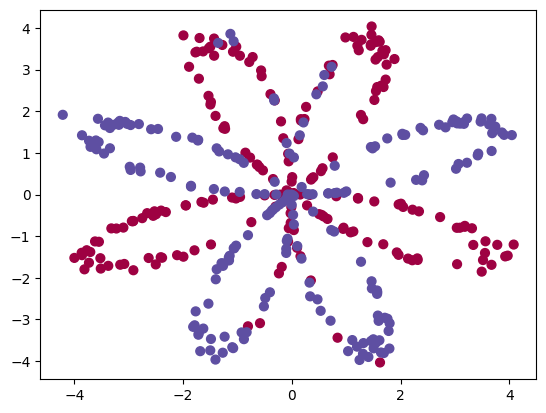

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Number of training examples: 400


In [2]:
X, Y = planar_utils.load_planar_dataset()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

shape_X = X.shape
shape_Y = Y.shape
# m is the number of training examples
m = (X.size)/shape_X[0]

print ('The shape of X is:', shape_X)
print ('The shape of Y is:', shape_Y)
print ('Number of training examples:', int(m))

Here, we have a dataset with two features `X1` and `X2` and a target variable `Y` conatining binary values `0(red)` and `1 (blue)`.

Now, before building the neural network, let's first build a logistic regression model to see how it performs on the dataset to understand the need for a neural networks. We will use the `scikit-learn` library to build the logistic regression model and plot the decision boundary to visualize the performance of the model.

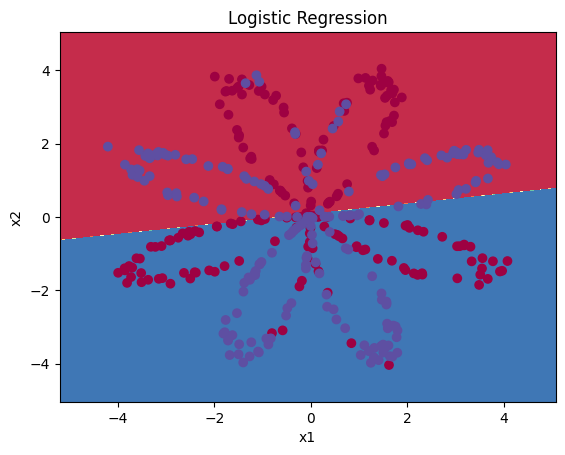

Accuracy of logistic regression: 47 %


In [3]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
planar_utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
plt.show()

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) + "%")

<strong>Interpretation</strong>: The dataset is not linearly separable, so logistic regression doesn't perform well.

### Neural Network Model
- Now, let's build a neural network model with a single hidden layer and see how it performs on the dataset.
- We will be using following network architecture:

![](Images/planar_nn_model.png)

The general methodology to build a Neural Network is to:
1. Define the neural network structure (# of input units, # of hidden units, etc)
2. Initialize the model's parameters
3. Loop: - Implement forward propagation - Compute loss - Implement backward propagation to get the gradients - Update parameters (gradient descent)

##### Defining the neural network structure
- We will start by defining the neural network structure.
- We define `n_x`: the size of the input layer, `n_h`: the size of the hidden layer and `n_y`: the size of the output layer.

In [4]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

##### Initialize the model's parameters

In [5]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    # Ensure the dimensions are correct
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

##### Forward Propagation

In [6]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1) # Hidden layer activation function
    Z2 = np.dot(W2,A1) + b2
    A2 = planar_utils.sigmoid(Z2) # Output layer activation function
    
    # Ensure the dimensions are correct
    assert(A2.shape == (1, X.shape[1]))
    
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backward propagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

##### Loss Function
Now that we have calculated $A^{[2]}$, we will compute the cost function given by:
$$\mathcal{L}\left(A^{[2]}, Y\right) = -\frac{1}{m} \sum_{i=1}^{m} \left(y^{\left(i\right)} \log\left(a^{\left[2\right]\left(i\right)}\right) + \left(1 - y^{\left(i\right)}\right) \log\left(1 - a^{\left[2\right]\left(i\right)}\right)\right)$$

In [7]:
def compute_cost(A2, Y):
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    # makes sure cost is the dimension we expect.
    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))
    
    return cost

##### Backward Propagation

In [8]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

##### Update Parameters using Gradient Descent
- General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.
- The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging).

![](Images/sgd.gif) ![](Images/sgd_bad.gif)

In [9]:
def update_parameters(parameters, grads, learning_rate):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

##### Integrating all functions in a to a model
- Now that we have implemented all the functions required for building a neural network, let's integrate them into a model function.

In [10]:
# NN_model
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters

##### Predictions
$$ \hat{Y} = \begin{cases} 1 & \text{if } A^{[2]} > 0.5 \\ 0 & \text{otherwise} \end{cases} $$

In [11]:
def predict(parameters, X):
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Now, it is time to run the model and see how it performs on the flower dataset.

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083


Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219404
Cost after iteration 9000: 0.218544


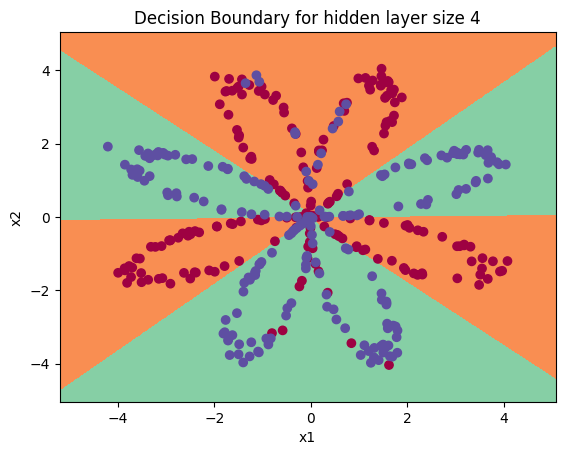

Accuracy: 90%


In [12]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
planar_utils.plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower!

Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.

##### Tuning hidden layer size
- Now let's try out different hidden layer sizes and see how the model performs.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


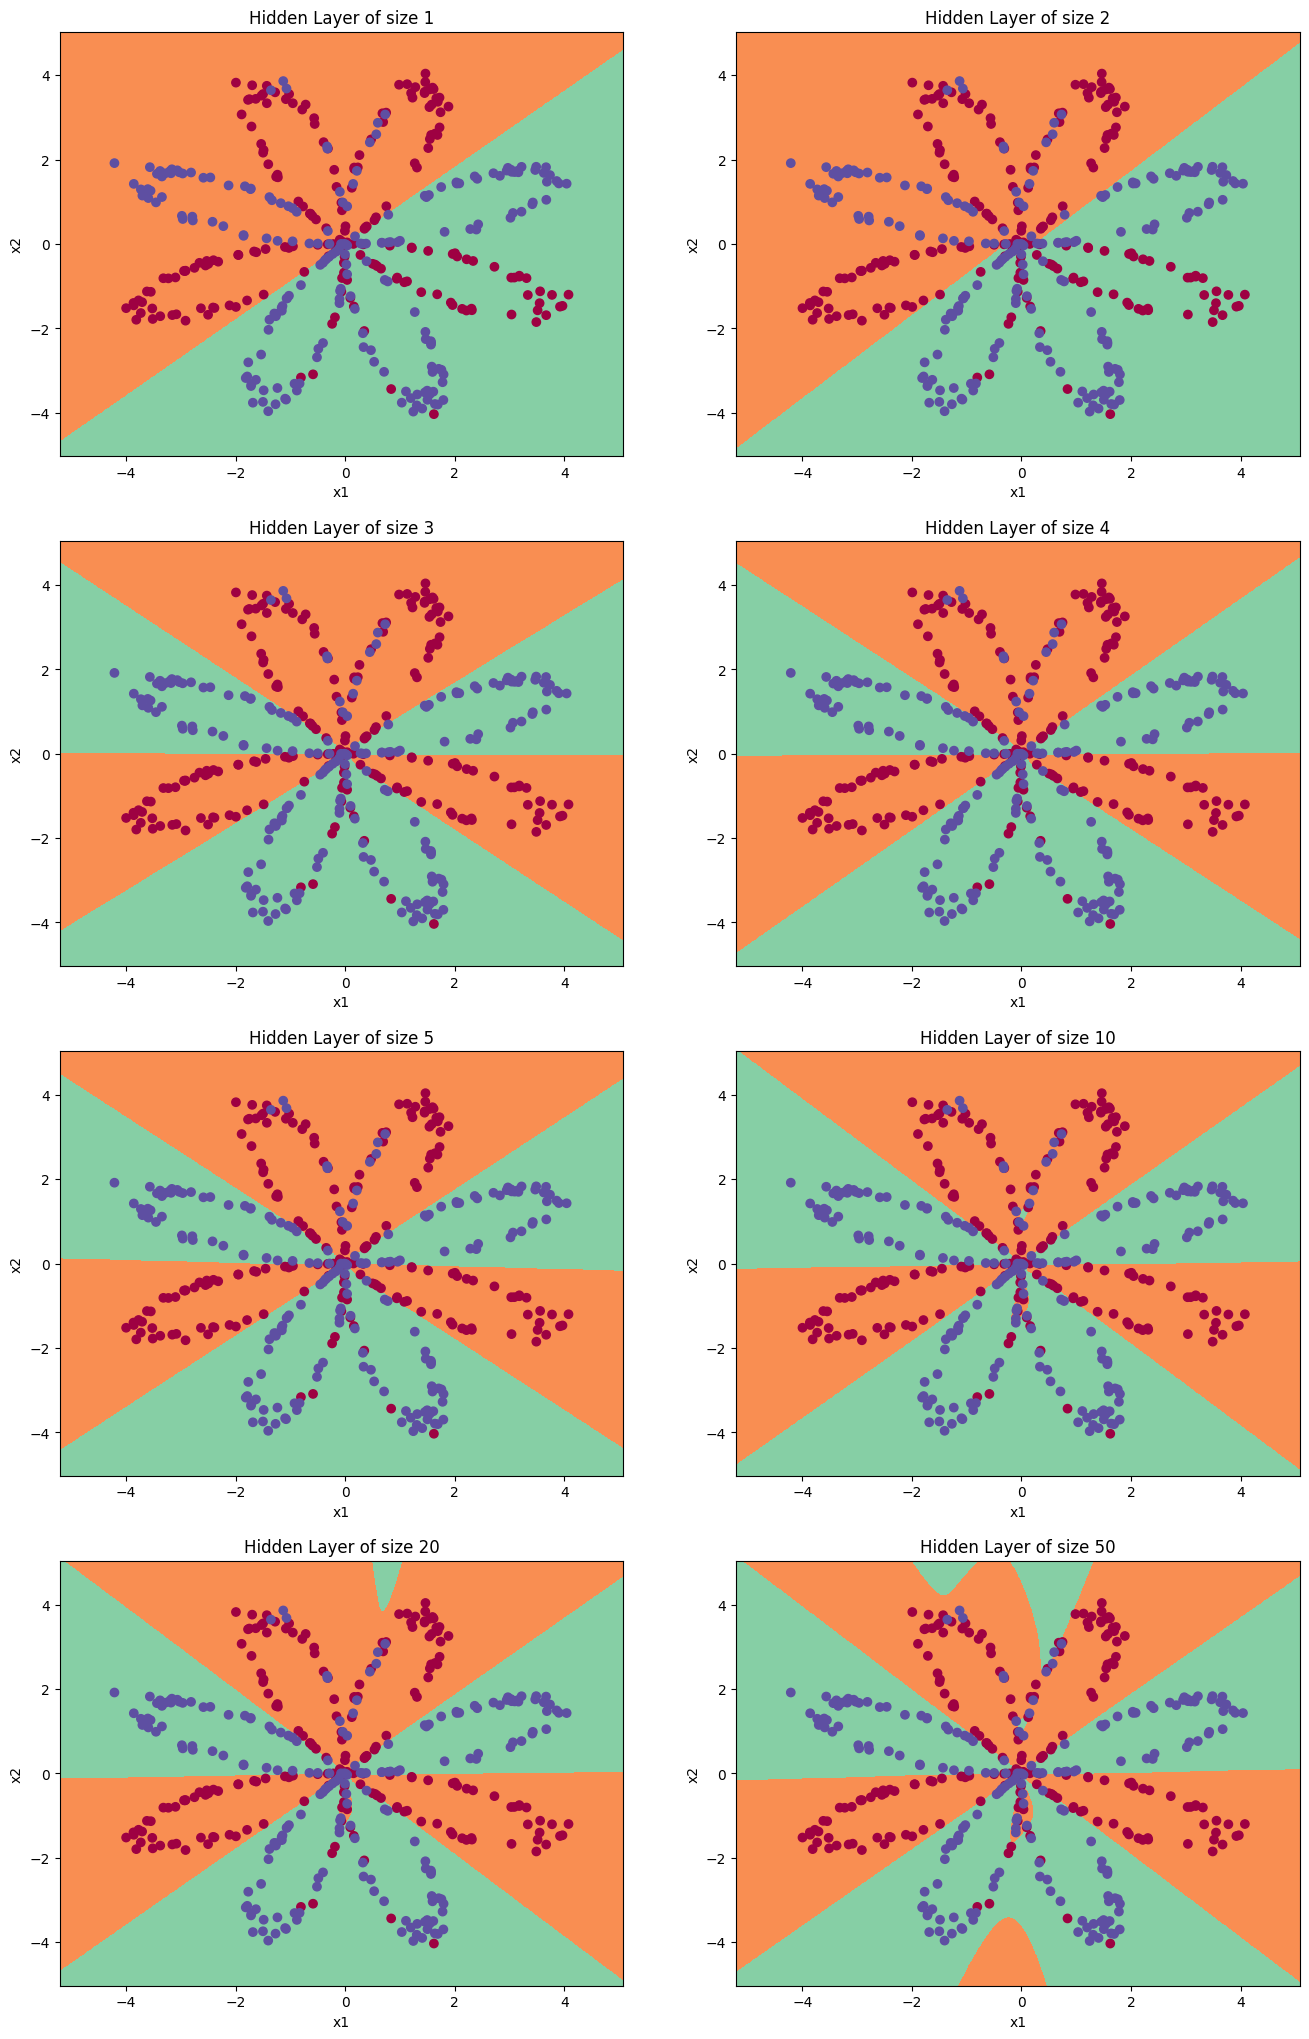

In [13]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    planar_utils.plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

##### Interpretations
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data.
- The best hidden layer size seems to be around $n_h$ = 5. Indeed, a value around here seems to fits the data well without also incurring noticeable overfitting.

## Deep Neural Networks
- Neural networks with more than one hidden layer are called `deep neural networks`.
- Deep neural networks are used to solve more complex problems.
- The total number of layers in a deep neural network is called the `depth` of the network, represented by $L$.

![](Images/deep_nn.png)

- The same process of forward and backward propagation can be repeated for all layers of the network as follows:
$$Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}$$
$$A^{[l]} = g^{[l]}\left(Z^{[l]}\right)$$
- where $g^{[l]}$ is the activation function for the $l^{th}$ layer.

- Further, the process is extended for all training examples by adding the loss from all examples and then updating the weights and biases accordingly.
$$\mathcal{L} = \frac{1}{M} \sum_{i=1}^{M} \mathcal{L}\left(a^{(i)}, y^{(i)}\right)$$
$$dZ^{[l]} = W^{[l+1]T} dZ^{[l+1]} * g^{[l]'}\left(Z^{[l]}\right)$$
$$dW^{[l]} = \frac{1}{M} dZ^{[l]} A^{[l-1]T}$$
$$db^{[l]} = \frac{1}{M} \sum_{i=1}^{M} dZ^{[l]\left(i\right)}$$

## Application of Deep Neural Networks: Image Classification
- Let's see how deep neural networks can be used for image classification as cat or non-cat.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from Utils import dnn_utils

%matplotlib inline

np.random.seed(1)

import warnings
warnings.filterwarnings('ignore')

##### Load Dataset
- Dataset downloaded from [https://www.kaggle.com/datasets/muhammeddalkran/catvnoncat](https://www.kaggle.com/datasets/muhammeddalkran/catvnoncat)
- Dataset contains a training set of $m_{train}$ images labelled as cat (1) or non-cat (0) and a test set of $m_{test}$ images labelled as cat and non-cat
- Each image is of shape ($num_{px}$, $num_{px}$, 3) where 3 is for the RGB channels.

In [15]:
train_x_orig, train_y, test_x_orig, test_y, classes = dnn_utils.load_data()

# Exploring the dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, we reshape and standardize the images before feeding them to the network

In [16]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


##### Architecture of the model
- We will build a deep neural network with $L-1$ hidden layers.

![](Images/cat_dnn_model.png)

- The model can be summarized as:
$$ [LINEAR -> RELU] \times (L-1) -> LINEAR -> SIGMOID$$

- Detailed Architecture:
    - The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
    - The corresponding vector is then multiplied by the weight matrix and bias is added. The result is called the `linear unit`.
    - Next, we take the `relu` of the linear unit. This process could be repeated several times for each depending on the model architecture.
    - Finally, we take the `sigmoid` of the final linear unit. If it is greater than 0.5, you classify it to be a cat and vice-versa.

##### Initialize Parameters

In [17]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        # Initialize the parameters
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        # Ensure the dimensions are correct
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

##### Forward Propagation

In [18]:
def linear_activation_forward(A_prev, W, b, activation):    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = dnn_utils.linear_forward(A_prev, W, b)
        A, activation_cache = dnn_utils.sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = dnn_utils.linear_forward(A_prev, W, b)
        A, activation_cache = dnn_utils.relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

##### Cost Function

In [19]:
def compute_cost(AL, Y):    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

##### Backward Propagation

In [20]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = dnn_utils.relu_backward(dA, activation_cache)
        dA_prev, dW, db = dnn_utils.linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = dnn_utils.sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = dnn_utils.linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

##### Update Parameters

In [21]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

##### Predictions

In [22]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

##### L-layer Neural Network
- Now that we have all the building blocks required to build a deep neural network, let's integrate them into a model function.
- Our model will have 4 layers with dimensions [12288, 20, 7, 5, 1].

In [23]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [24]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.figsize=(14, 6)
    plt.show()
    
    return parameters

Now that we have built the model, let's train it on the cat dataset and see how it performs.

Cost after iteration 0: 0.771749


Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


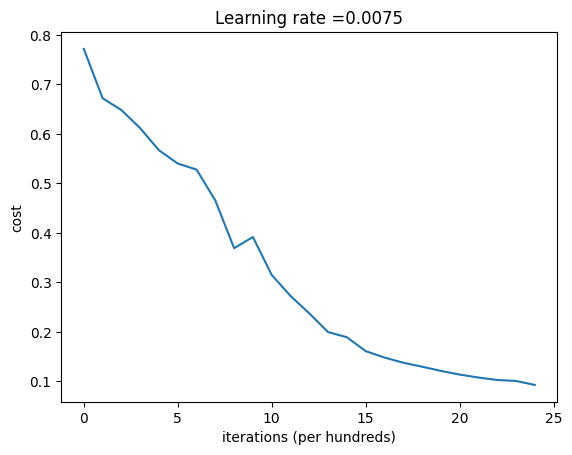

In [25]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Now, that our model is trained, let's see how it performs by calculating the accuracy on the training and test sets.

In [26]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [27]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


We have achieved an accuracy of 98.5% on the training set and 80% on the test set. This is a good performance.

Let us analyze where our model is going wrong by looking at some images it failed to classify.

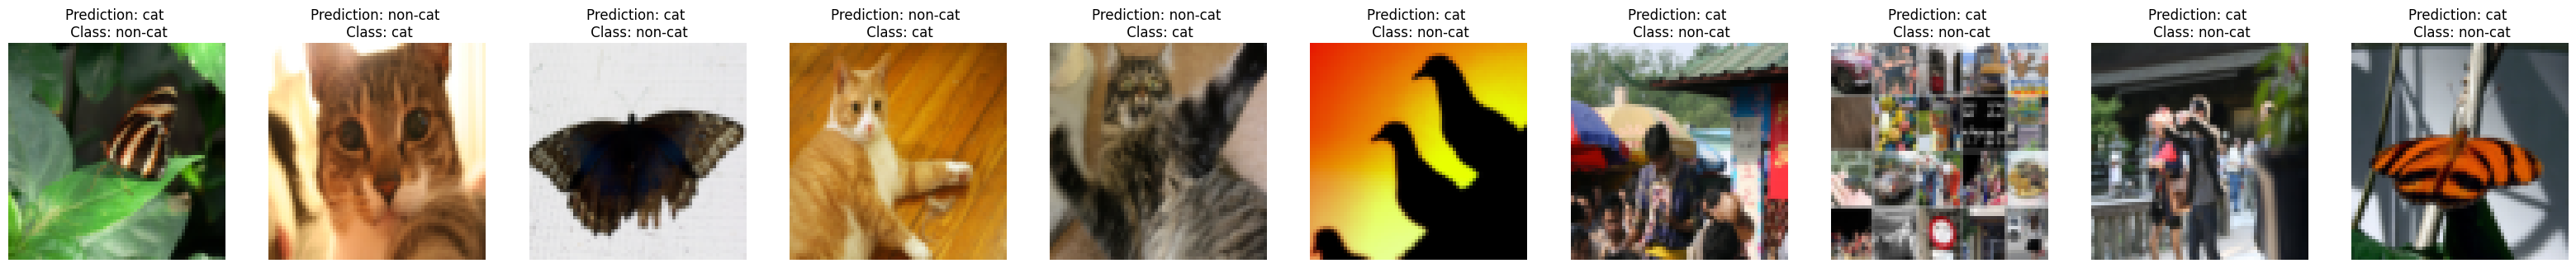

In [28]:
dnn_utils.print_mislabeled_images(classes, test_x, test_y, pred_test)

A few types of images the model tends to do poorly on include:
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image)

We can try to improve the performance by tuning the model hyperparameters like number of hidden layers, number of hidden units, etc.

## More Complex Neural Networks
- Till now, we saw some simple neural networks with some or many hidden layers.
- There are some more complex neural networks that are used to solve more complex problems.
- For example:
    - `Convolutional Neural Networks (CNNs)`: Used for image classification, object detection, etc.
    - `Recurrent Neural Networks (RNNs)`: Used for natural language processing, speech recognition, etc.
    - `Generative Adversarial Networks (GANs)`: Used for generating new data, image to image translation, etc.
- Let's discuss CNN in brief.

### Convolutional Neural Networks (CNNs)
- As name suggests, CNNs involve `convolutional layers`, i.e., layers that apply convolutional operations to the input data using filters.
- A CNN is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology.
- A CNN has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:
    - Convolution layer
    - ReLU layer
    - Pooling layer
    - Fully connected layer
- We will not go in much detail about them, but let's see some most popular CNN models used these days.
- Visit the [link](https://www.coursera.org/learn/convolutional-neural-networks) in case you want to learn more about CNNs.

1. `LeNet-5`: One of the earliest CNN architectures used for handwritten digit recognition.

![](Images/lenet5.png)

2. `AlexNet`: The first CNN to win the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

![](Images/alexnet.png)

3. `VGG-16`: A CNN model that was runner-up in the ILSVRC 2014 competition.

![](Images/vgg16.png)

- There are many more models like `GoogLeNet`, `ResNet`, `Inception`, etc. that are used for various tasks.

##### That's all for this tutorial. Hope you enjoyed it!
- Learn more about hyperparameter tuning and regularization [here](https://www.coursera.org/learn/deep-neural-network)
- Learn more about CNNs [here](https://www.coursera.org/learn/convolutional-neural-networks)
- Learn more about RNNs [here](https://www.coursera.org/learn/nlp-sequence-models)